# Tutorial 'QC, topographical analysis and segmentaton-free of Spot-based transcriptomics data'

This is the fast lane of the tutorial. Just start a session and click 'run the whole notebook' on the top to start executing.

UMAP calculation takes a few minutes, which we can use in the main notebook to get familiar with the general exploratory workflow.

In [1]:
# widens the screen:

%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

In [2]:
# imports, define a handy figure function:

import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

def figure():
    plt.figure(figsize=(15,15))


In [3]:
# load background stain:
coordinates = pd.read_csv('./data/in_situ_sequencing/coordinates.csv')
bg = -plt.imread('background.jpg').mean(-1)
bg = (bg-bg.min())/(bg.max()-bg.min())
bg_map = pl.PixelMap(pixel_data=bg,
                     cmap='Greys',
                     px_p_um = 0.504)
del bg

In [4]:
sdata = pl.SpatialData(x_coordinates=coordinates.Global_x_pos,
                       y_coordinates=coordinates.Global_y_pos,
                       genes=coordinates.Gene,
                       pixel_maps={'DAPI':bg_map}
                      ).spatial[:,3000:]

In [5]:
sdata = sdata[sdata.stats.progressive_sample(1.1)]

In [6]:
# Parameterization for data cleaning/artefact removal:`

import time

knn_neighbors=250
bandwidth=30
n_neighbors=50
metric='euclidean'
min_dist=0.02
random_state=42
zero_weight=0.0
cutoff=10

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)


t = time.perf_counter()
sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight,cutoff=cutoff)
t = (time.perf_counter()-t)
print(t)

Reducing dimensions with FastICA


/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Calculating UMAP embedding.
504.9080894359795


In [7]:
assert False

AssertionError: 

In [8]:
sdata.save('tutorial-umap.pl')

Text(0.5, 0.98, 'nbrs:100-cutoff:30-bw:30-t:174866')

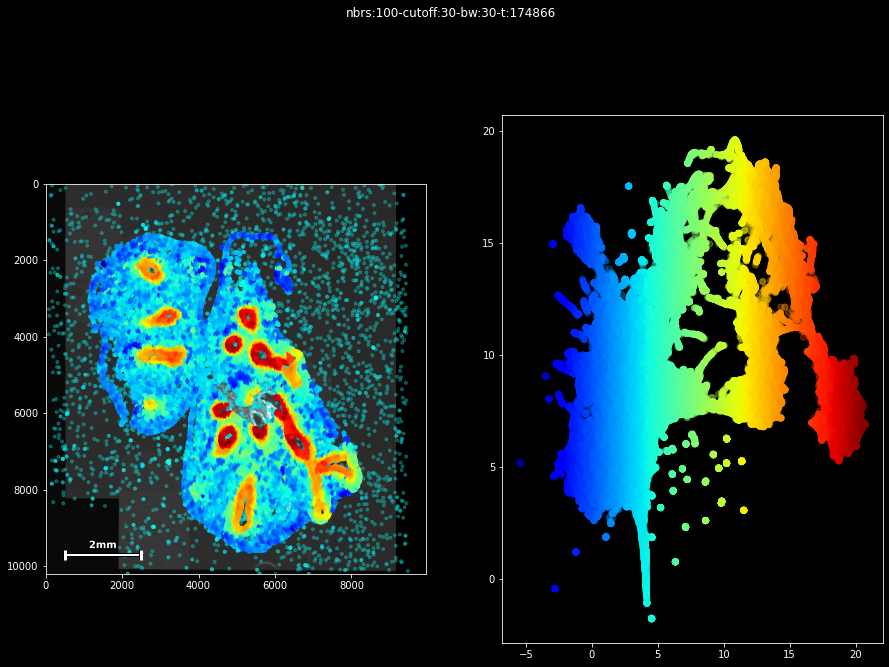

In [71]:
plt.figure(figsize=(15,15))

sdata.graph.map_and_umap(alpha=0.3,c=sdata.graph.umap_0)
plt.suptitle(f"nbrs:{n_neighbors}-cutoff:{cutoff}-bw:{bandwidth}-t:{int(t)}")

In [17]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

In [31]:
sdata

,g,x,y,gene_id,bg_noise,inner_ducts,outer_ducts_1,endothelial,inner_ducts_1,inner_ducts_2,outer_ducts_2,NOTCH4,epithel
1,FLT1,1194.492023,1908.912407,47,True,False,False,False,False,False,False,False,False
2,JAG2,1614.313488,1852.936212,69,True,False,False,False,False,False,False,False,False
3,RSPO2,1634.304986,1940.898805,107,False,False,False,True,False,False,False,False,True
7,SFRP1,1762.250575,1986.879251,112,False,False,False,True,False,False,False,False,True
8,SPRY1,1768.248025,1988.878401,120,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494141,FGFR4,8918.207391,9942.495999,46,True,False,False,False,False,False,False,False,False
494144,MET,9209.083692,8432.138303,81,True,False,False,False,False,False,False,False,False
494145,FGFR4,9292.048410,7289.624175,46,True,False,False,False,False,False,False,False,False
494146,FGFR4,9343.026730,8295.196539,46,True,False,False,False,False,False,False,False,False


In [32]:
sdata_epi = sdata[~sdata.bg_noise & (sdata.inner_ducts_1|sdata.inner_ducts_2)]

In [ ]:
figure()

from plankton.utils import hbar_compare

hbar_compare(sdata[sdata.noise].stats, sdata[~sdata.noise].stats,('noise','signal'))

In [66]:
# Parameterization for data cleaning/artefact removal:`

import time

knn_neighbors=250
bandwidth=25
n_neighbors=100
metric='euclidean'
min_dist=0.2
random_state=42
zero_weight=0.0
cutoff=30

_=sdata_epi.graph.update_knn(n_neighbors=knn_neighbors)


t = time.perf_counter()
sdata_epi.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight,cutoff=cutoff)
print(time.perf_counter()-t)


Reducing dimensions with FastICA


/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning:

From version 1.3 whiten='unit-variance' will be used by default.



Calculating UMAP embedding.
86.40790056399419


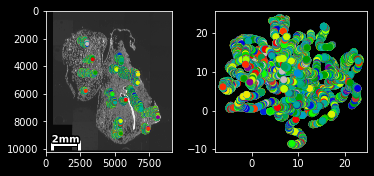

In [67]:
sdata_epi.graph.map_and_umap()

In [68]:
sdata_epi.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…